In [1]:
import pandas as pd
import numpy as np
import requests
binance  = "https://www.binance.com/api/v1/klines?symbol=BTCUSDT&interval=1d"
r = requests.get(binance)
data = r.json()

df = pd.DataFrame(columns=["price"])
for row in data:
    df = df.append(pd.DataFrame([float(row[1])],columns=df.columns))
df.index = [i for i in range(df.shape[0])]
df

,price
0,4261.48
1,4285.08
2,4108.37
3,4120.98
4,4069.13
5,4016.00
6,4040.00
7,4147.00
8,4316.01
9,4280.71


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


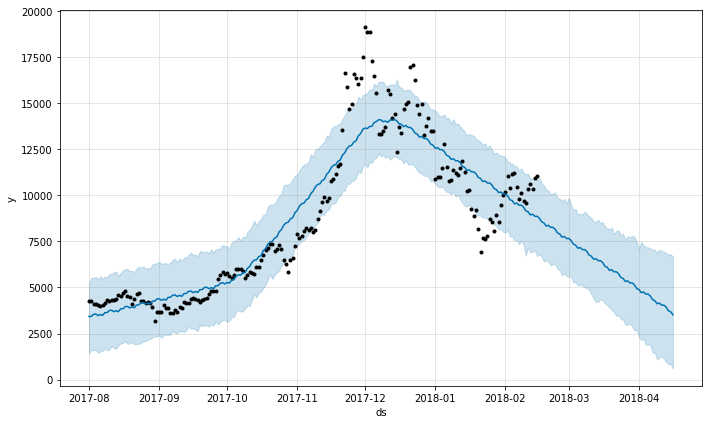

In [2]:
from fbprophet import Prophet
from matplotlib import pyplot as plt
import time

test_size = 60
date_index = pd.date_range('08-01-2017',periods=df.shape[0]-test_size,freq='D')
btc = pd.DataFrame({'ds':date_index, 'y':df['price'].values[:-test_size]})

st = time.time()
m = Prophet().fit(btc)
ft = time.time()

future = m.make_future_dataframe(periods=test_size)
fcst = m.predict(future)
m.plot(fcst)
plt.show()

In [3]:
ft-st

0.2614593505859375

In [4]:
def sMAPE(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / ((y_true + y_pred)/2) )) * 100
sMAPE(df['price'][-test_size:],fcst['yhat'][-test_size:])

32.847191813662242

In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df['price'][-test_size:], fcst['yhat'][-test_size:]))
rms

2797.3382294254234

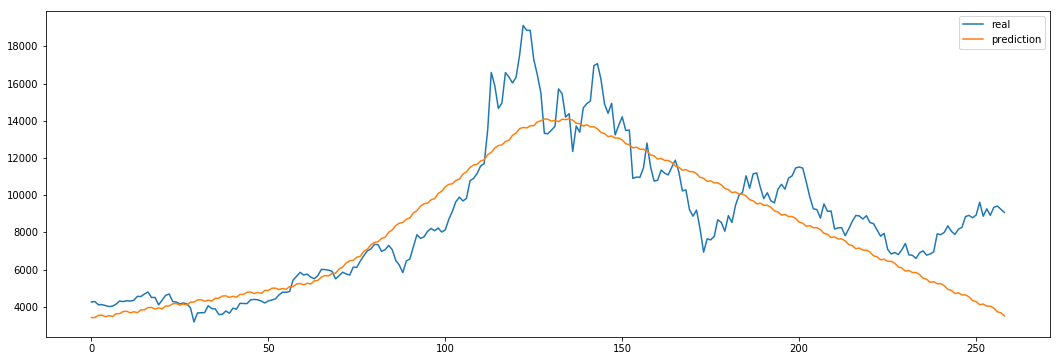

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,6))
plt.plot(pd.Series(df['price'].values,index=range(df.shape[0])),label="real")
plt.plot(pd.Series(fcst['yhat'].values,index=range(df.shape[0])),label="prediction")
#plt.plot(pd.Series(preds,index=range(df.shape[0]-test_size,df.shape[0])),label="prediction")
plt.legend()
plt.show()